<a href="https://colab.research.google.com/github/Wrietenea/py_opencv/blob/main/opencv_colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

find all orange squares

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [2]:
img = cv2.imread('rect.jpg')
orange_color_low = (10, 50, 70)
orange_color_high = (24, 255, 255) 

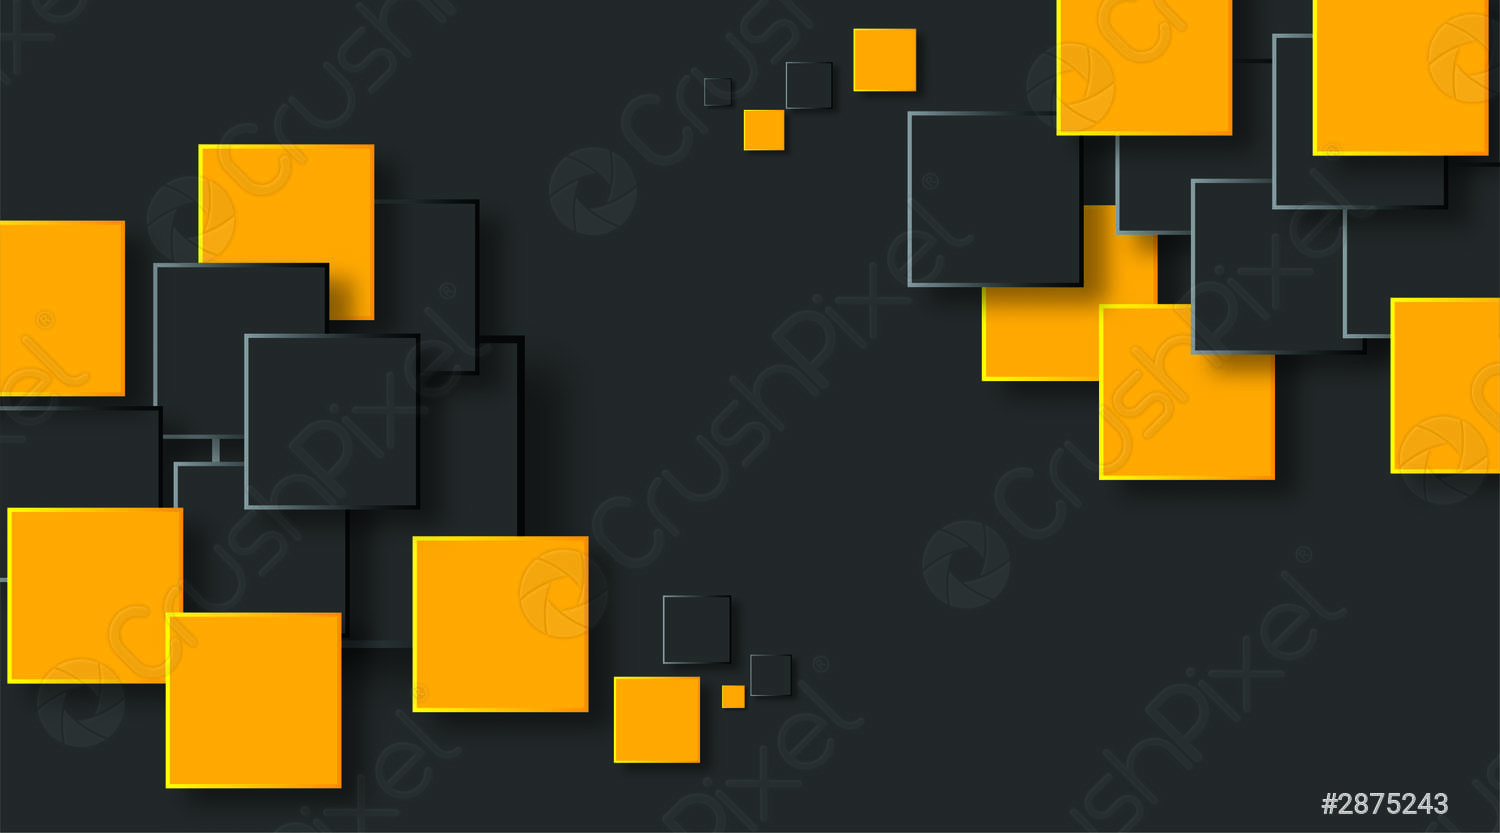

In [3]:
cv2_imshow(img)

In [4]:
img_cnt = img.copy()
hsv_min = orange_color_low
hsv_max = orange_color_high
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV ) # меняем цветовую модель с BGR на HSV 
thresh = cv2.inRange( hsv, hsv_min, hsv_max ) # применяем цветовой фильтр


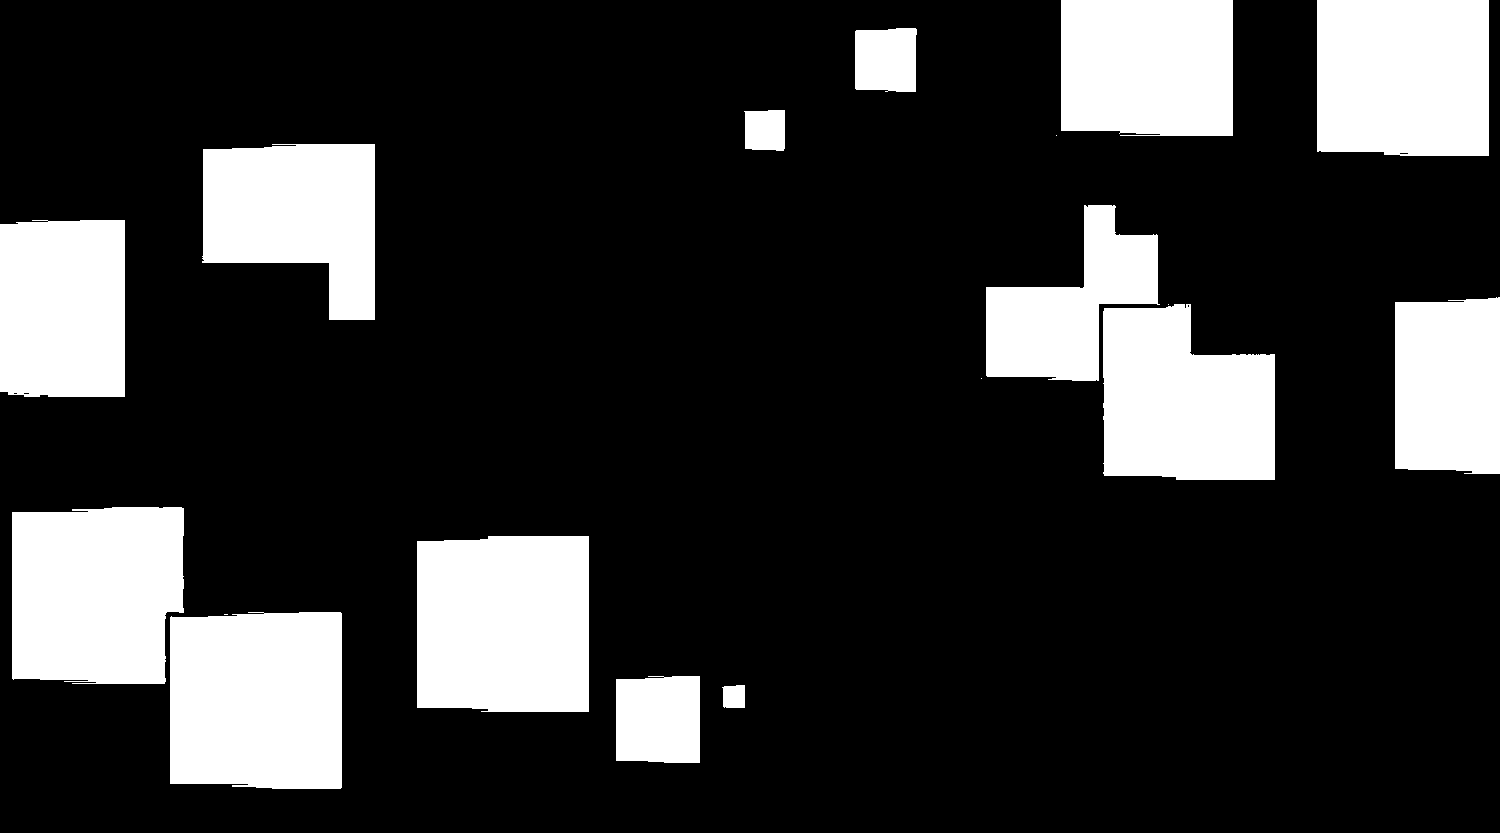

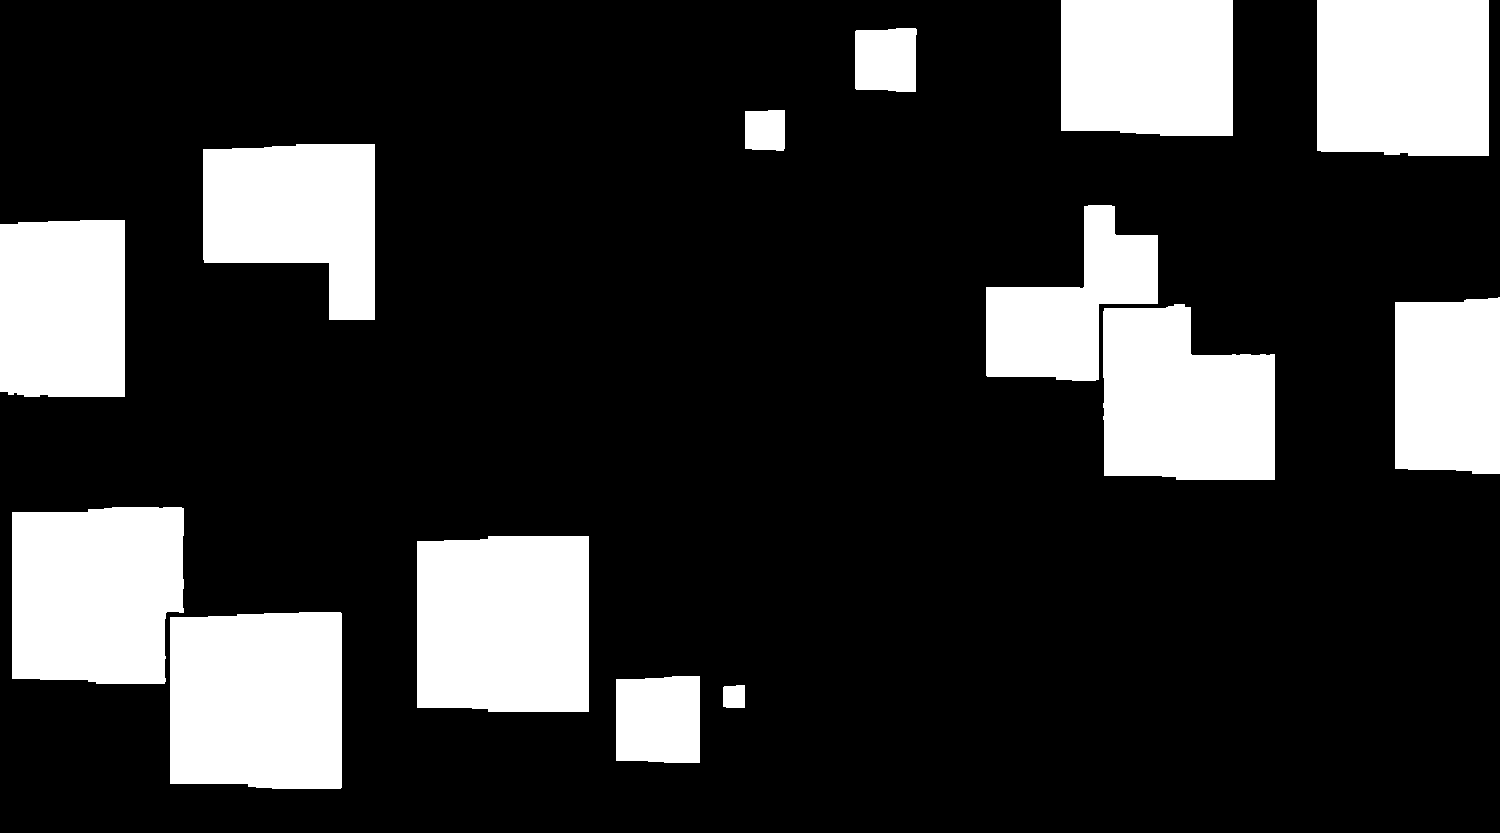

In [5]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
cv2_imshow(thresh)
cv2_imshow(closing)

In [6]:
 # ищем все контуры
contours, hierarchy = cv2.findContours(closing.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

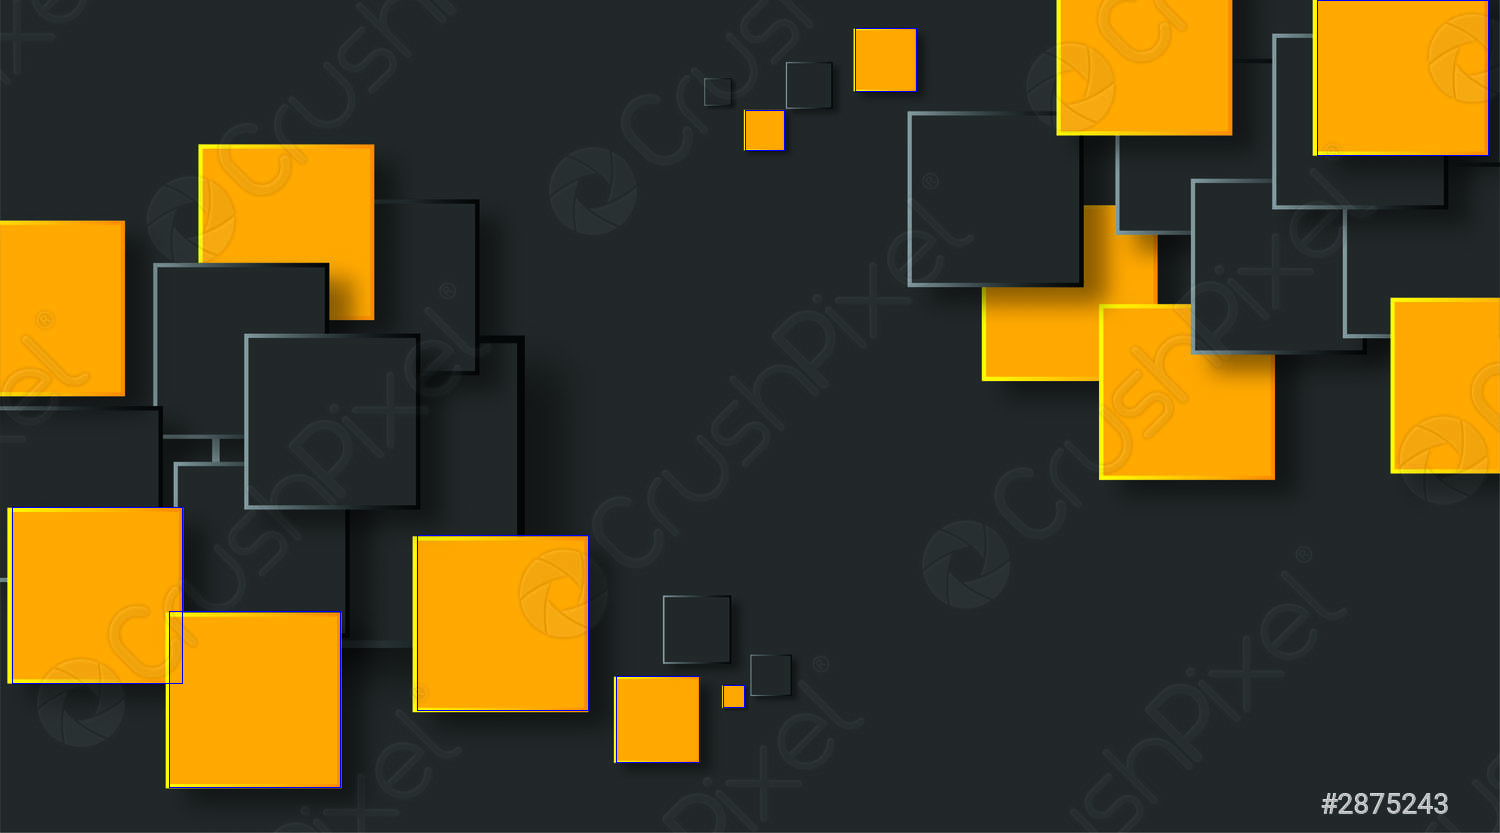

In [7]:
#ищем квадраты
k=0
for cnt in contours:
        M = cv2.moments(cnt)
        rect = cv2.minAreaRect(cnt) # прямоугольник
        box = cv2.boxPoints(rect) # поиск четырех вершин прямоугольника
        box = np.int0(box)
        if rect[1][0]/rect[1][1] < 1.2 and rect[1][0]/rect[1][1]>0.8 and M['m00'] > 0.9 * int(rect[1][0]*rect[1][1]):
        
          cv2.drawContours(img_cnt,[box],0,(255,0,0),0)
          k+=1
cv2_imshow(img_cnt)


In [8]:
k #сколько штук

8